Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

Loading Dataset

In [2]:
wine_df = pd.read_csv(r'winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_df.shape

(1599, 12)

Checking Missing Values

In [4]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
wine_df.duplicated().sum()

240

In [6]:
wine_df.drop_duplicates(inplace=True)

In [7]:
round(wine_df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.0,1359.0,1359.0,1359.0,1359.0,1359.0,1359.0,1359.0,1359.0,1359.0,1359.0,1359.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,47.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,63.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


Data Analysis and Visualization

[Text(0, 0, '10'),
 Text(0, 0, '53'),
 Text(0, 0, '577'),
 Text(0, 0, '535'),
 Text(0, 0, '167'),
 Text(0, 0, '17')]

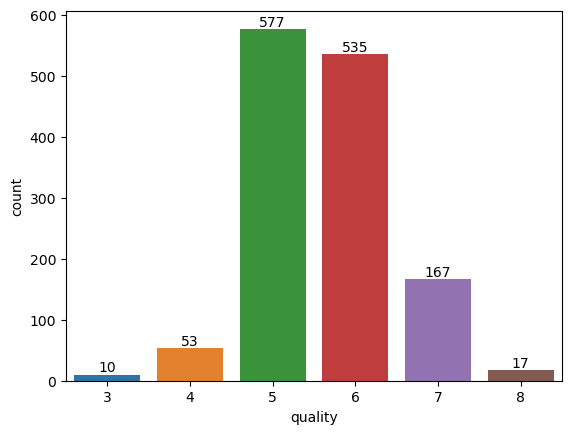

In [8]:
ax = sns.countplot(data=wine_df, x='quality')
ax.bar_label(ax.containers[0])

volatile acidity vs quality

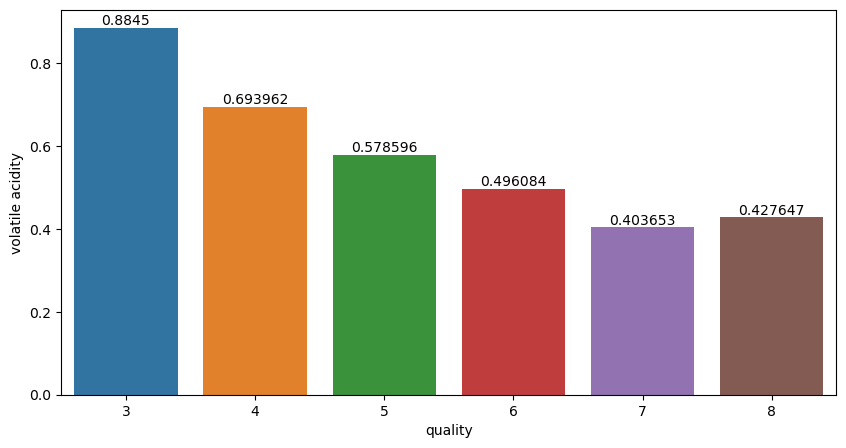

In [9]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=wine_df, x='quality', y='volatile acidity', errorbar=('ci',0))
ax.bar_label(ax.containers[0])
plt.show()

-----------------Conclusion : Higher the volatile acidity, lower the quality

citric acid vs quality

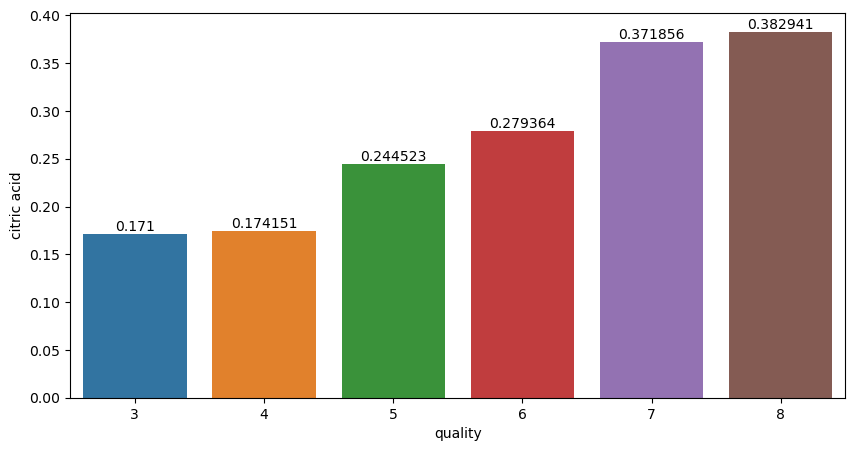

In [10]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=wine_df, x='quality', y='citric acid', errorbar=('ci',0))
ax.bar_label(ax.containers[0])
plt.show()

--------------------Conclusion : Higher the citric acid, Higher the quality

correlation

In [11]:
correlation = wine_df.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


Heatmap

<Axes: >

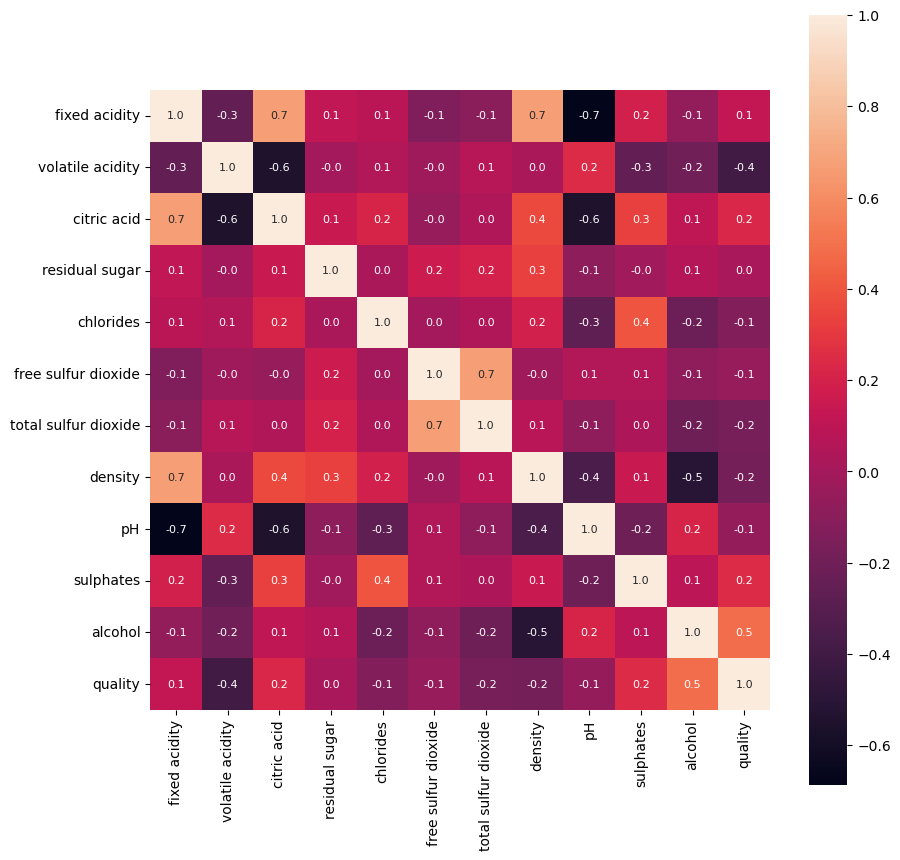

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, square=True, cbar=True, annot_kws={'size':8}, fmt='.1f')

seperate the data and label

In [13]:
X = wine_df.drop(labels='quality', axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [14]:
Y = wine_df.quality.apply(lambda y_value : 1 if y_value >= 7 else 0)
Y

0       0
1       0
2       0
3       0
5       0
       ..
1593    0
1594    0
1595    0
1597    0
1598    0
Name: quality, Length: 1359, dtype: int64

Train and Test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [16]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

Model Evaluation

calculating accuracy score

In [17]:
y_pred = model.predict(X_test)

In [18]:
accuracy_score = accuracy_score(y_pred, y_test)

In [19]:
accuracy_score * 100

91.54411764705883

Saving a trained model

In [20]:
import pickle

In [21]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

Making a Predictive System

In [22]:
input_data = (7.9	,0.35	,0.46	,3.6	,0.078	,15	,37	,0.9973	,3.35	,0.86	,12.8)

input_data_as_array = np.asarray(input_data)

input_data_reshaped = input_data_as_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('Wine quality is not good')
else:
    print('Wine quality is good')

[1]
Wine quality is good


c:\Users\every\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


loading the saved model

In [23]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [24]:
loaded_model

RandomForestClassifier()